<a id="ref1"></a>
<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

### Import Require Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale from Kaggle.

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [9]:
# Reading Data
dataset = pd.read_csv('FuelConsumptionCo2.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploratory Data Analysis


#### Data Inspection

In [19]:
dataset.shape

(1067, 13)

In [22]:
#shows column name with the type of column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [23]:
# shows summary of statistic for numerical column
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Data Cleaning


In [26]:
# Checking Null values
dataset.isnull().sum()*100 / dataset.shape[0]
## There are no NULL values in the dataset, hence it is clean.

MODELYEAR                   0.0
MAKE                        0.0
MODEL                       0.0
VEHICLECLASS                0.0
ENGINESIZE                  0.0
CYLINDERS                   0.0
TRANSMISSION                0.0
FUELTYPE                    0.0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: float64

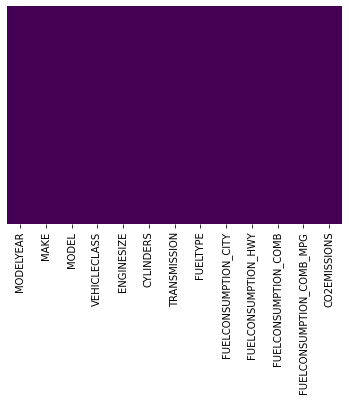

In [17]:
# heatmap shows we dont have any missing data. 
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
#Lets select somefeatures to explore more
cdf = dataset[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


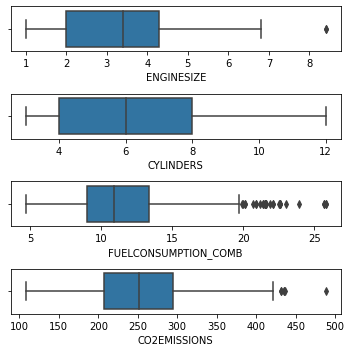

In [57]:
#outlier Analysis 
#sns.boxplot(dataset['ENGINESIZE'])
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(dataset['ENGINESIZE'], ax = axs[0])
plt2 = sns.boxplot(dataset['CYLINDERS'], ax = axs[1])
plt3 = sns.boxplot(dataset['FUELCONSUMPTION_COMB'], ax = axs[2])
plt4 = sns.boxplot(dataset['CO2EMISSIONS'], ax = axs[3])
plt.tight_layout()

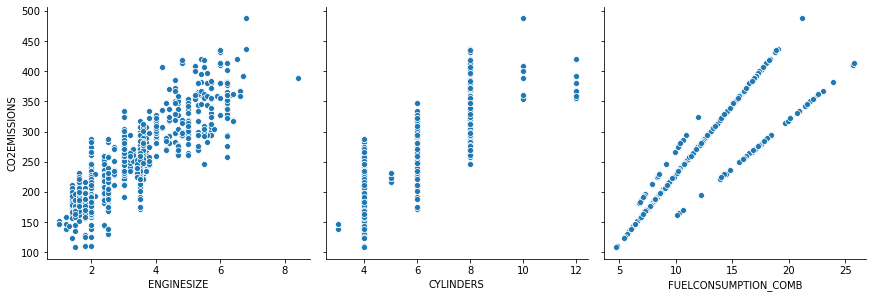

In [59]:
# Let's see how Co2Emissin are related with other feature using scatter plot.
sns.pairplot(dataset, x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars= ['CO2EMISSIONS'], height=4, aspect=1, kind='scatter')
plt.show()

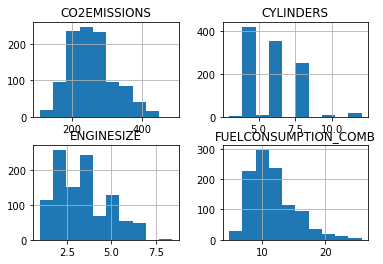

In [60]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show() 

In [68]:
df= dataset.select_dtypes(exclude='O')
df.drop(['MODELYEAR'], axis =1).corr()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


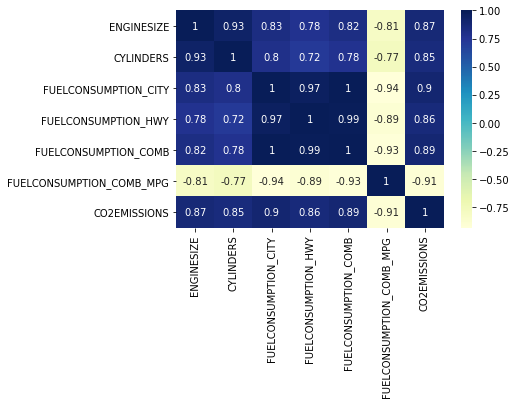

In [69]:
# Let's see the correlation between different features.
sns.heatmap(df.drop(['MODELYEAR'], axis =1).corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Splittng the dataset into the Training set  and Test set 
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 20% in your test dataset

In [88]:
X = np.asanyarray(dataset[['ENGINESIZE']])
y = np.asanyarray(dataset[['CO2EMISSIONS']])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2 , random_state=0 )      

In [89]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


 Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Text(0, 0.5, 'Emissions')

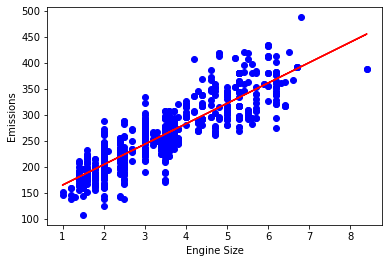

In [94]:
# we can use this model for ploting or next one
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_trin, regr.coef_[0][0]*X_trin + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

### Predicting the Test set result

### Visulizing the training set result

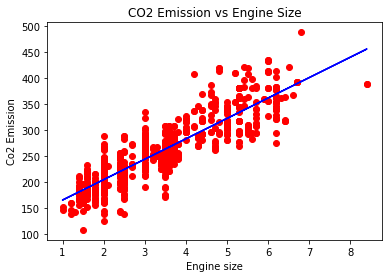

In [95]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train) , color = 'blue')
plt.title("CO2 Emission vs Engine Size")
plt.xlabel('Engine size')
plt.ylabel('Co2 Emission')
plt.show()


### Visualising the Test set result

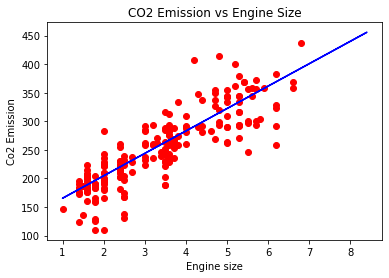

In [97]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regr.predict(X_train) , color = 'blue')
plt.title("CO2 Emission vs Engine Size")
plt.xlabel('Engine size')
plt.ylabel('Co2 Emission')
plt.show()

#### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [109]:
from sklearn.metrics import r2_score

y_pred = regr.predict(X_test)
print ('Mean absolute error : %.2f' % np.mean(np.absolute(y_pred - y_test)))
print ('Residual sum of square (MSE): %.2f' % (np.mean(y_pred - y_test) **2))
print ('R2-score: %.2f' % r2_score(y_pred, y_test))


Mean absolute error : 25.57
Residual sum of square (MSE): 41.84
R2-score: 0.63
